In [7]:
from oniakRun.aggregate_result import aggregate_result

ts = list(range(10, 31, 2))
root = "/media/mydrive/CDMA"
cm = [False, True]

import json, os
import numpy as np

filename = os.path.join(root, "result/threshold/t{}_seed*.json")
xs = np.arange(10000, 40000, 2000)
ys = {}
agg_keys = {
    "success": "avg",
    "time": ("avg", "if", lambda dik: dik["success"], "key", lambda dik: dik["time"][-1]),
    "total communication cost": ("avg", "if", lambda dik: dik["success"]),
    "communication rounds": ("avg", "if", lambda dik: dik["success"]),
    "number of failed blocks": ("avg"),
    "number of recenters": ("avg"),
}

for t in ts:
    ys[t] = aggregate_result(filename.format(t), agg_keys)
        
# ys, cm

In [8]:
ys

{10: {'success': 0.0,
  'time': None,
  'total communication cost': None,
  'communication rounds': None,
  'number of failed blocks': 165.012,
  'number of recenters': 334.802},
 12: {'success': 0.075,
  'time': 70.62382939348,
  'total communication cost': 2452632.6133333333,
  'communication rounds': 14.96,
  'number of failed blocks': 119.176,
  'number of recenters': 1022.317},
 14: {'success': 0.976,
  'time': 49.26120186609741,
  'total communication cost': 1843021.0297131147,
  'communication rounds': 9.912909836065573,
  'number of failed blocks': 68.214,
  'number of recenters': 1231.603},
 16: {'success': 0.976,
  'time': 40.57020155842214,
  'total communication cost': 1606375.237704918,
  'communication rounds': 7.947745901639344,
  'number of failed blocks': 30.788,
  'number of recenters': 601.774},
 18: {'success': 0.976,
  'time': 37.1439254452746,
  'total communication cost': 1533342.6485655739,
  'communication rounds': 7.11577868852459,
  'number of failed blocks':

In [4]:
import glob
for f in glob.glob("result/threshold/t16_seed*.json"):
    with open(f) as fp:
        data = json.load(fp)
        if data["success"]:
            continue
        else:
            print(data)
            break

{'A intersect B remaining': [205, 370, 229, 63, 5, 0, 0, 0, 0], 'A minus B remaining': [10000, 2578, 2579, 147, 147, 1, 1, 1, 1], 'A minus B size': 10000, 'A size': 1000000, 'B minus A remaining': [4267, 4267, 804, 804, 7, 7, 0, 0, 0], 'B size': 1000000, 'bch capacity': 16, 'bch encoding': True, 'bch order': 10, 'comm costs': [502513.0, 418673.0, 331265.0, 203034.0, 114582.0, 29825.0, 4023.0, 513.0, 385.0, 385.0], 'communication rounds': 9, 'counting': True, 'd': 200000, 'doro costs': [502513.0, 323665.0, 209873.0, 140177.0, 58193.0, 14353.0, 1265.0, 385.0, 385.0, 385.0], 'finger costs': [0, 95008.0, 121392.0, 56176.0, 39440.0, 13024.0, 2384.0, 112.0, 0.0, 0.0], 'id': 1, 'k': 9, 'lb': -2, 'max comm rounds': 15, 'max process': 34, 'max rounds': 1000, 'num peels': [5944, 13557, 17297, 20029, 20952, 21115, 21122, 21122, 21122], 'number of corrected errors': 2377, 'number of failed blocks': 32, 'number of recenters': 626, 'resolving costs': [0, 0.0, 0.0, 6681.0, 16949.0, 2448.0, 374.0, 16.

<Axes: title={'center': 'Success Rates'}, xlabel='Sketch Size (\\# Counters)', ylabel='Success Rate'>

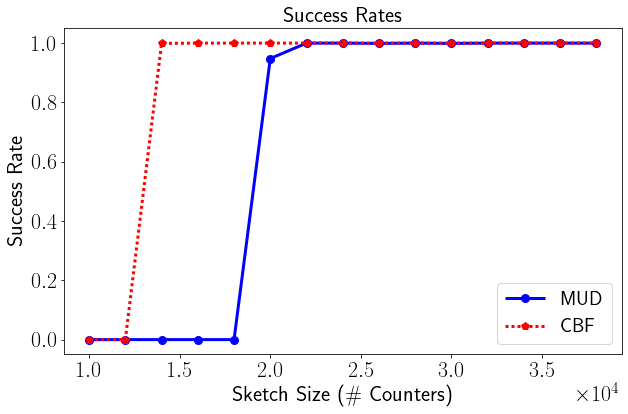

In [3]:
from oniakPlot import line_plot

idx = [ (False, 6), (True, 5)]
labels = ["MUD", "CBF"]
data = [(xs, np.array([ys[cm, to, x]["success"] for x in xs])) for (cm, to) in idx] 

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Success Rate", 
                      "Success Rates", "plots/suc_2p.pdf",
                      figsize=(10, 6))

<Axes: xlabel='Sketch Size (\\# Counters)', ylabel='Unit Cost (bits)'>

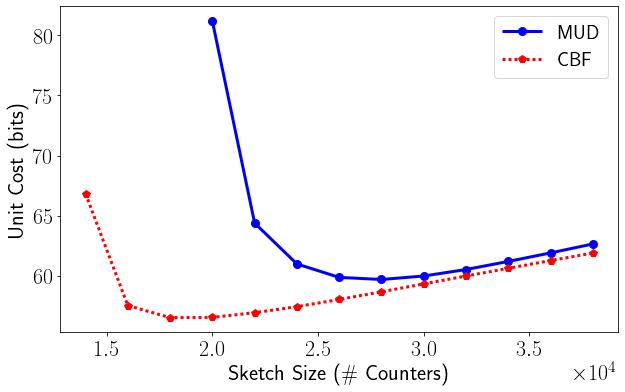

In [16]:
data = [] 
for (cm, to) in idx:
    y = []
    for x in xs:
        val = ys[cm, to, x]["total communication cost"]
        val = val / 2000 if val is not None else None
        y.append(val)
    data.append((xs, np.array(y)))

labels = ["MUD", "CBF"]
line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Unit Cost (bits)", 
                      "", "plots/cost_2p.pdf",
                      figsize=(10, 6))

<Axes: xlabel='Sketch Size (\\# Counters)', ylabel='Rounds Needed'>

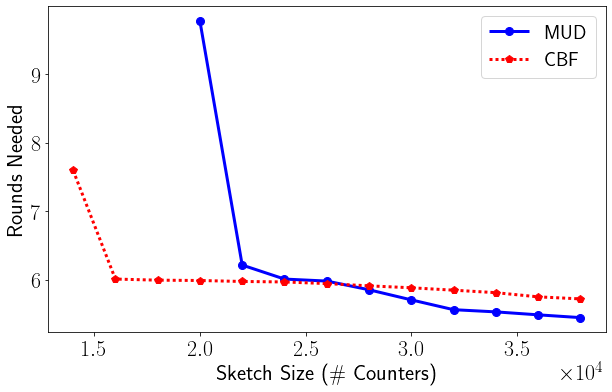

In [8]:
data = [(xs, np.array([ys[cm, to, x]["communication rounds"] for x in xs])) for (cm, to) in idx] 
labels = ["MUD", "CBF"]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Rounds Needed", 
                      "", "plots/round_2p.pdf", 
                      figsize=(10, 6))
        

<Axes: title={'center': 'Decoding time'}, xlabel='Sketch Size (\\# Counters)', ylabel='Time (s)'>

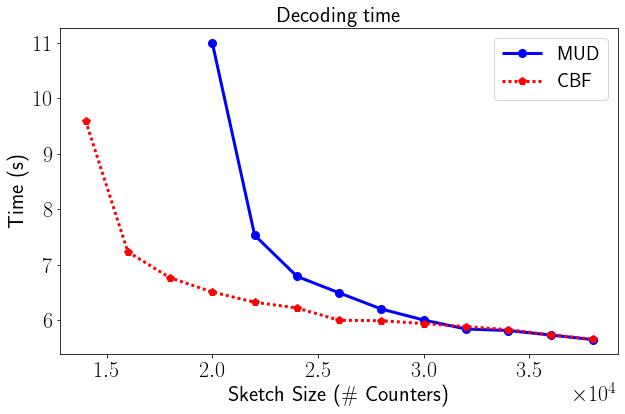

In [4]:
data = [(xs, np.array([ys[cm, to, x]["time"] for x in xs])) for (cm, to) in idx] 
labels = ["MUD", "CBF"]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Time (s)", "Decoding time", "plots/rev_time.pdf",
                      figsize=(10, 6))